## Regresyon (Regression)
<i> Regresyon verilar arası ilişkileri anlamamıza yardımcı olan güçlü bir istatistiksel yöntemdir. Temel olarak bir bağımlı değişkenin bir veya daha fazla değişknele nasıl değişknle değiştiğini inceler

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [73]:
df=pd.read_csv(filepath_or_buffer='data/50_Startups.csv')
df.head()

# burada öncelikle datayı çekiyoruz ve overall neler olduğunu inceliyoruz

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [74]:
df.dtypes
# burada veri tiplerini incelemekteyiz.

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [75]:
df.shape
# 1000 satır 6 sütunluk bir verimiz bulunmaktadır

(50, 5)

In [76]:
df.isnull().sum()

#missing value olup olmadığını görüyoruz. Bu veri setimizde bulunmamaktadır.

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [77]:
# Veri tipi object olanları saptaytıp ardından drop edebilelim

obj_data = df.dtypes == np.object_
obj_data

R&D Spend          False
Administration     False
Marketing Spend    False
State               True
Profit             False
dtype: bool

In [78]:
categorical_colums = df.columns[obj_data]
categorical_colums

Index(['State'], dtype='object')

In [79]:
df.drop(
    columns=['State'],
    index=1,
    inplace=True
)

In [80]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12


In [81]:

df['Total_Spend'] = df['R&D Spend'] + df['Administration'] + df['Marketing Spend']

In [82]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Total_Spend
0,165349.20,136897.80,471784.10,192261.83,774031.10
2,153441.51,101145.55,407934.54,191050.39,662521.60
3,144372.41,118671.85,383199.62,182901.99,646243.88
4,142107.34,91391.77,366168.42,166187.94,599667.53
5,131876.90,99814.71,362861.36,156991.12,594552.97


In [83]:
df.corr()['Profit'].sort_values(ascending=False)

Profit             1.000000
R&D Spend          0.970572
Total_Spend        0.860485
Marketing Spend    0.726331
Administration     0.165328
Name: Profit, dtype: float64

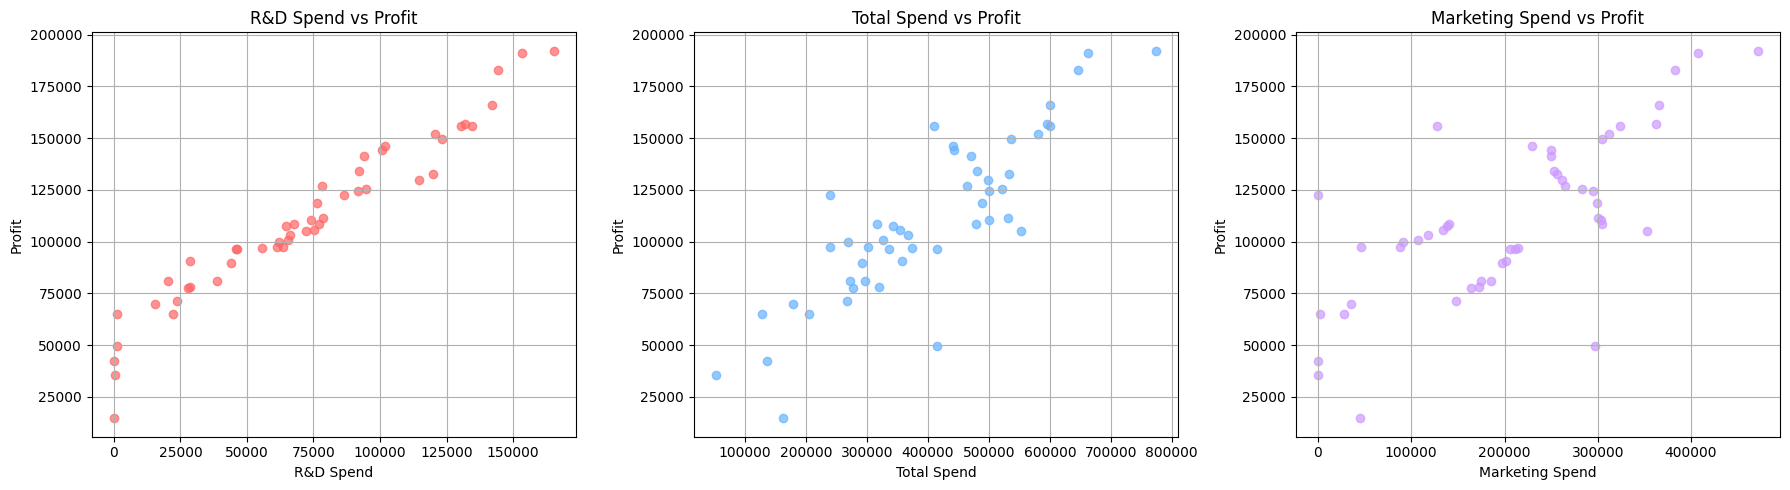

In [84]:
# verlilerimizi görselleştirelim. Profit ile R&D Spend, Total_Spend ve Marketing Spend'i görselleştirelim

fig, axes = plt.subplots(1,3, figsize=(18, 5))

colors = ['#FF6666', '#66B2FF', '#CC99FF']



axes[0].scatter(df['R&D Spend'], df['Profit'], c=colors[0], alpha =0.7)
axes[0].set_title('R&D Spend vs Profit', fontsize=12)
axes[0].set_xlabel('R&D Spend', fontsize=10)
axes[0].set_ylabel('Profit', fontsize=10)
axes[0].grid(True)



axes[1].scatter(df['Total_Spend'], df['Profit'], c=colors[1], alpha =0.7)
axes[1].set_title('Total Spend vs Profit', fontsize=12)
axes[1].set_xlabel('Total Spend', fontsize=10)
axes[1].set_ylabel('Profit', fontsize=10)
axes[1].grid(True)


axes[2].scatter(df['Marketing Spend'], df['Profit'], c=colors[2], alpha =0.7)
axes[2].set_title('Marketing Spend vs Profit', fontsize=12)
axes[2].set_xlabel('Marketing Spend', fontsize=10)
axes[2].set_ylabel('Profit', fontsize=10)
axes[2].grid(True)



plt.tight_layout()
plt.show()


In [85]:
# #idari işleri ayrıca görmek için bu şekilde tek bir ilişkiyi görselleştirmek için aşağıdaki gibi yazım da mevcuttur


# plt.scatter(df['Administration'], df['Profit'])
# plt.xlabel('Administration')
# plt.ylabel('Profit')
# plt.show()

In [86]:
# multiple regresyon için kümülatif bir veri seti oluşturalım

cdf = df[['R&D Spend', 'Total_Spend', 'Marketing Spend', 'Profit']]

cdf.head()

,R&D Spend,Total_Spend,Marketing Spend,Profit
0,165349.20,774031.10,471784.10,192261.83
2,153441.51,662521.60,407934.54,191050.39
3,144372.41,646243.88,383199.62,182901.99
4,142107.34,599667.53,366168.42,166187.94
5,131876.90,594552.97,362861.36,156991.12


In [87]:
from scipy.stats import skew

for col in cdf.columns:
    print(f'{col} Çarpıklık (skewness): {skew(cdf[col]):.2f}\n')

R&D Spend Çarpıklık (skewness): 0.13

Total_Spend Çarpıklık (skewness): 0.01

Marketing Spend Çarpıklık (skewness): -0.09

Profit Çarpıklık (skewness): -0.03



In [88]:
#Tüm değişkenkler simetrik veya simetriye yakın olduğundan dolayı dönüşüme ihtiyaç olmamaktadır.
#bu sebepten dolayı buradan sadece ölçeklendirme ile normalizasyon yapmaktayız



from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()
X = df[['R&D Spend', 'Total_Spend', 'Marketing Spend']]
y = df[['Profit']]

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)


scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_df['Profit'] = y_scaled

scaled_df.head()

,R&D Spend,Total_Spend,Marketing Spend,Profit
0,2.120099,2.431389,2.258091,2.119693
1,1.849924,1.708624,1.715071,2.088330
2,1.644155,1.603117,1.504708,1.877379
3,1.592762,1.301226,1.359863,1.444675
4,1.360643,1.268075,1.331738,1.206582


In [89]:
from sklearn.model_selection import train_test_split


# X = X_scaled_df
# y= df['Profit'] 

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
# print(f'X Train set:  {X_train.shape}')
# print(f'X Test set:  {X_test.shape}')
# print(f'y Train set:  {y_train.shape}')
# print(f'y Train set:  {y_test.shape}')



from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(scaled_df, train_size=0.8, random_state = 42)
print(f'Train Set: {train_df.shape}\nTest Set: {test_df.shape}')



Train Set: (39, 4)
Test Set: (10, 4)


In [90]:
from sklearn.linear_model import LinearRegression

# Özellikleri ve hedefi ayır
X_train = np.asanyarray(train_df[['R&D Spend', 'Total_Spend', 'Marketing Spend']])
y_train = np.asanyarray(train_df['Profit'])

X_test = test_df[['R&D Spend', 'Total_Spend', 'Marketing Spend']]
y_test = test_df['Profit']

# Modeli eğit
model = LinearRegression()
model.fit(X_train, y_train)

model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False
